# Titanic project

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

Framework:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

Building a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## 2. Data

The data has been split into two groups:

 * training set (train.csv)
 * test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

Data are available on Kaggle website: https://www.kaggle.com/competitions/titanic/data

## 3. Evaluation

We want to reach at least 80% accuracy whether the passenger survived or not.

## 4. Features

**Create data dictionary**


* survival - Survival	                  0 = No, 1 = Yes
* pclass - Ticket class	                  1 = 1st, 2 = 2nd, 3 = 3rd
* sex - Sex	
* Age - Age in years	
* sibsp - # of siblings / spouses aboard the Titanic	
* parch - # of parents / children aboard the Titanic	
* ticket - Ticket number	
* fare - Passenger fare	
* cabin - Cabin number	
* embarked - Port of Embarkation	      C = Cherbourg, Q = Queenstown, S = Southampton=0 for them.

**Variable Notes**
* pclass: A proxy for socio-economic status (SES)
  * 1st = Upper
  * 2nd = Middle
  * 3rd = Lower
* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* sibsp: The dataset defines family relations in this way...
  * Sibling = brother, sister, stepbrother, stepsister
  * Spouse = husband, wife (mistresses and fiancés were ignored)
* parch: The dataset defines family relations in this way...
  * Parent = mother, father
  * Child = daughter, son, stepdaughter, stepson
  * Some children travelled only with a nanny, therefore parch=0 for them.

In [11]:
# Importing the tools needed and starting regular EDA (exploratory data analysis)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [12]:
# Loading data
df_test = pd.read_csv("gender_submission.csv")

In [13]:
df_test

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [14]:
df=pd.read_csv("train.csv")

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.shape

(891, 12)

In [17]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# EDA Checklist

1. What questions are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of our data?

In [19]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

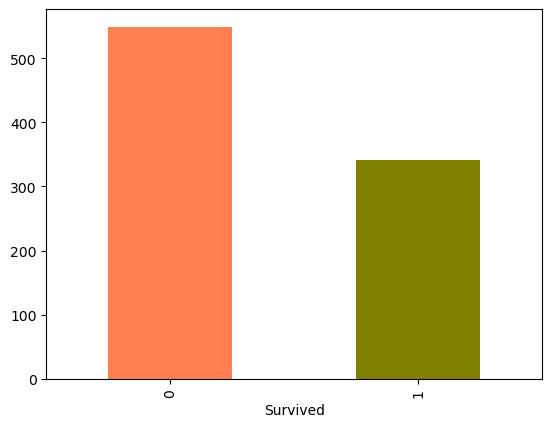

In [20]:
df["Survived"].value_counts().plot(kind="bar", color=["coral", "olive"]);

In [21]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [23]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [24]:
# # Comparing different columns with the Survived column
# pd.crosstab(df.Sex, df.Survived)

In [25]:
pd.crosstab(df.Embarked, df.Survived)

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [26]:
pd.crosstab(df.Pclass, df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [27]:
pd.crosstab(df.SibSp, df.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [28]:
pd.crosstab(df.Parch, df.Survived)

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


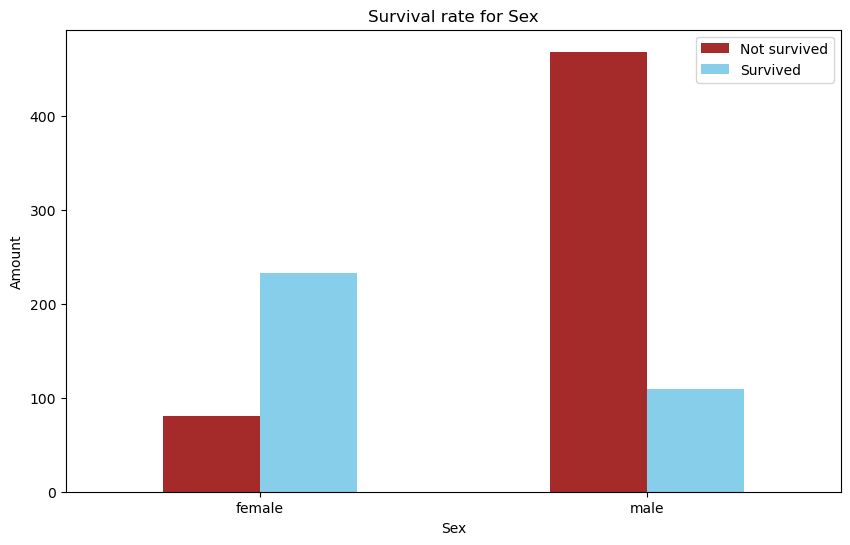

In [29]:
pd.crosstab(df.Sex, df.Survived).plot (kind="bar",
                                       figsize=(10,6),
                                       color=["brown","skyblue"])
plt.xticks(rotation=0);
plt.title("Survival rate for Sex")
plt.ylabel("Amount")
plt.legend(["Not survived", "Survived"]);

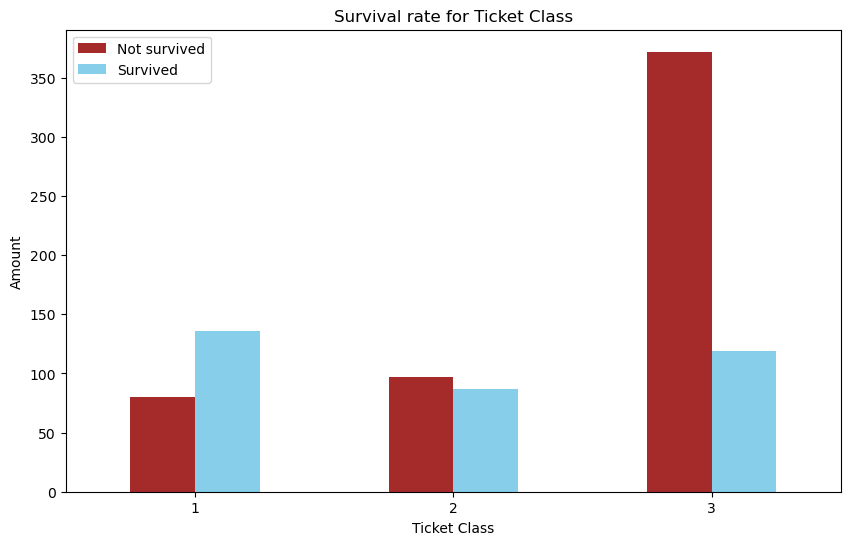

In [30]:
pd.crosstab(df.Pclass, df.Survived).plot (kind="bar",
                                       figsize=(10,6),
                                       color=["brown","skyblue"])
plt.xticks(rotation=0);
plt.title("Survival rate for Ticket Class")
plt.xlabel ("Ticket Class")
plt.ylabel("Amount")
plt.legend(["Not survived", "Survived"]);

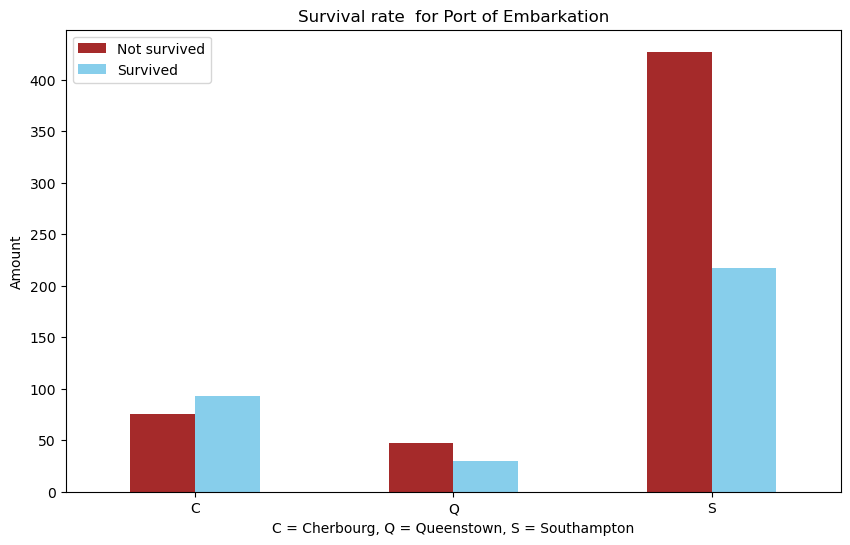

In [31]:
pd.crosstab(df.Embarked, df.Survived).plot (kind="bar",
                                       figsize=(10,6),
                                       color=["brown","skyblue"])
plt.xticks(rotation=0);
plt.title("Survival rate  for Port of Embarkation")
plt.xlabel ("C = Cherbourg, Q = Queenstown, S = Southampton")
plt.ylabel("Amount")
plt.legend(["Not survived", "Survived"]);

In [32]:
df.Age[df.Survived==1]

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

<Axes: ylabel='Frequency'>

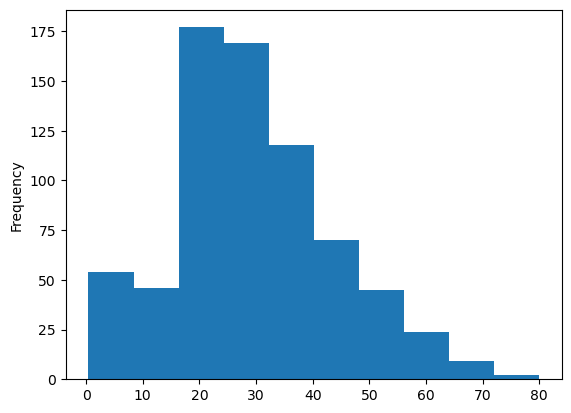

In [33]:
# Plotting histograms
df.Age.plot.hist()

In [34]:
features = ["Pclass", "Age", "SibSp", "Parch", "Fare"]

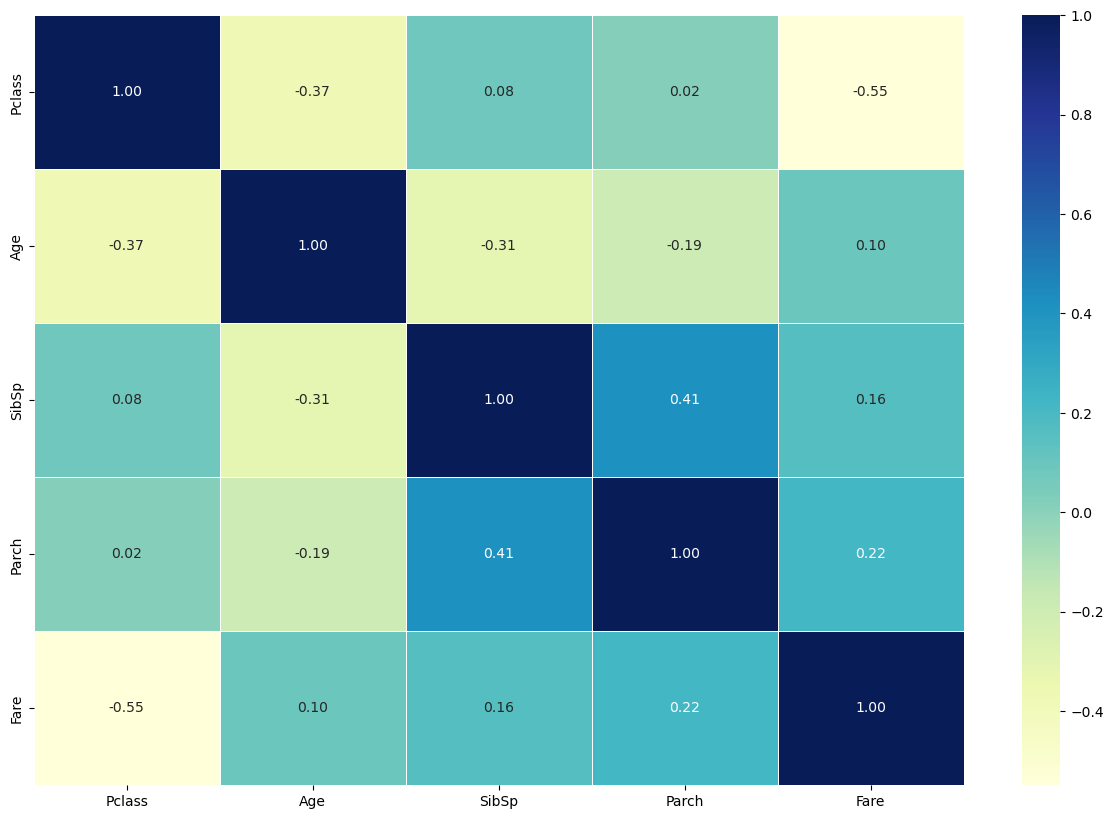

In [35]:
# Now let's make a corelation matrix
corr_matrix = df[features].corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");      

In [36]:
!pip install seaborn --upgrade

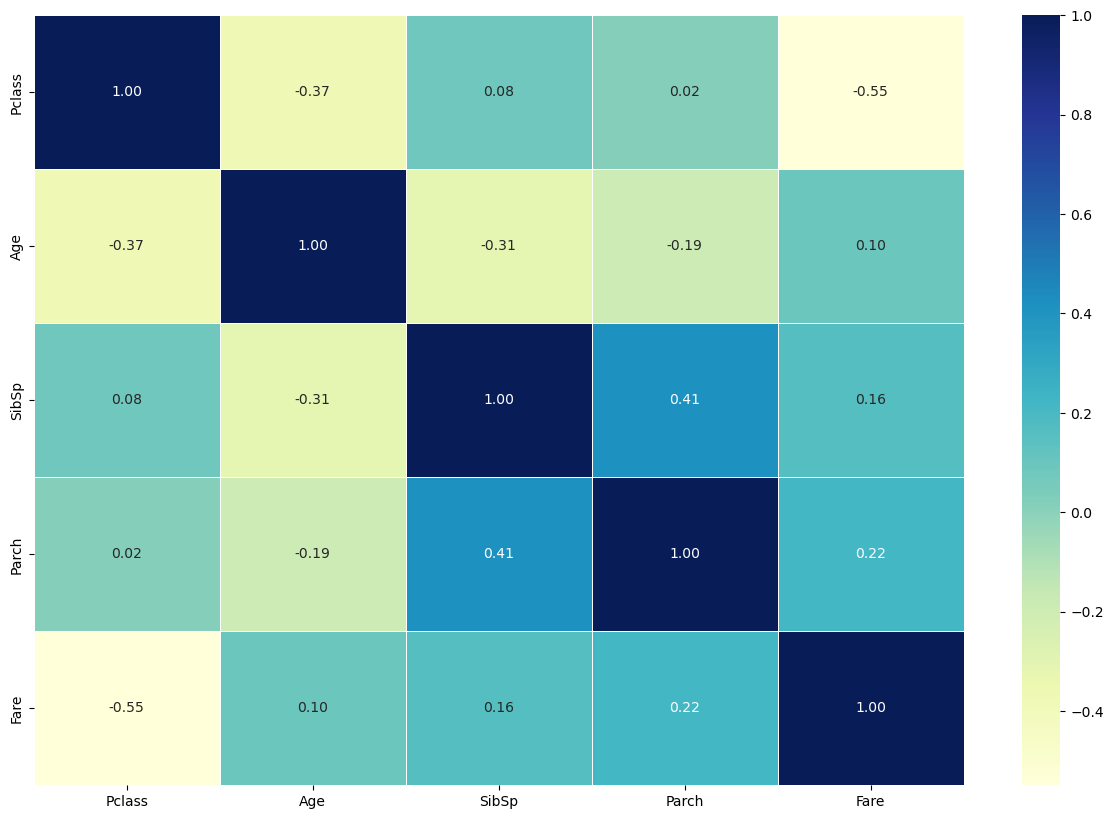

In [37]:
# Now let's make a corelation matrix
corr_matrix = df[features].corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");    

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
df["cabin_adv"]=df.Cabin.apply(lambda x: str(x)[0])

In [41]:
df.cabin_adv.value_counts()

cabin_adv
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [42]:
# Since we had one T cabin occupant and in test data none, we had different sets so we will delete the one in train set
df = df.drop(df.index[339])

In [43]:
df.cabin_adv.value_counts()

cabin_adv
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: count, dtype: int64

In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_adv
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,n


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Survived     890 non-null    int64  
 2   Pclass       890 non-null    int64  
 3   Name         890 non-null    object 
 4   Sex          890 non-null    object 
 5   Age          713 non-null    float64
 6   SibSp        890 non-null    int64  
 7   Parch        890 non-null    int64  
 8   Ticket       890 non-null    object 
 9   Fare         890 non-null    float64
 10  Cabin        203 non-null    object 
 11  Embarked     888 non-null    object 
 12  cabin_adv    890 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 97.3+ KB


In [46]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
cabin_adv        0
dtype: int64

In [47]:
# Removing the 2 missing Embarked rows
df.dropna(subset=["Embarked"], inplace=True)

In [48]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
cabin_adv        0
dtype: int64

In [49]:
df.drop(["Cabin"], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,cabin_adv
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,n
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,n
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,n
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


In [50]:
df = df.drop(["Cabin"], axis=1)

In [51]:
df[190:210]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,cabin_adv
191,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,S,n
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,S,n
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,S,F
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,C,B
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,C,B
196,197,0,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,Q,n
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,S,n
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,Q,n
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,S,n
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,345770,9.5000,S,n


In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,cabin_adv
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,n


In [53]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
cabin_adv        0
dtype: int64

In [54]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

PassengerId
Survived
Pclass
Age
SibSp
Parch
Fare


In [55]:
# Completing the missing Age data with the mean
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [56]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
cabin_adv      0
dtype: int64

In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,cabin_adv
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,n


In [58]:
# Dropping the Name and Ticket columns, since it is irelevant for us and makes our models error
df = df.drop(["Ticket"], axis=1)

In [59]:
df = df.drop(["Name"], axis=1)

In [60]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_adv
0,1,0,3,male,22.0,1,0,7.2500,S,n
1,2,1,1,female,38.0,1,0,71.2833,C,C
2,3,1,3,female,26.0,0,0,7.9250,S,n
3,4,1,1,female,35.0,1,0,53.1000,S,C
4,5,0,3,male,35.0,0,0,8.0500,S,n


In [61]:
nou = df.sort_values("cabin_adv")

In [62]:
nou[190:210]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_adv
516,517,1,2,female,34.000000,0,0,10.5000,S,F
75,76,0,3,male,25.000000,0,0,7.6500,S,F
618,619,1,2,female,4.000000,2,1,39.0000,S,F
183,184,1,2,male,1.000000,2,1,39.0000,S,F
776,777,0,3,male,29.620492,0,0,7.7500,Q,F
699,700,0,3,male,42.000000,0,0,7.6500,S,F
148,149,0,2,male,36.500000,0,2,26.0000,S,F
205,206,0,3,female,2.000000,0,1,10.4625,S,G
394,395,1,3,female,24.000000,0,2,16.7000,S,G
251,252,0,3,female,29.000000,1,1,10.4625,S,G


Now we need to convert all strings into numbers. We can do that by turning the strings into category values.

In [63]:
# We need to verify if the variable type is a string or not
pd.api.types.is_string_dtype(df["cabin_adv"])

True

In [64]:
# Turning strings into categories
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label]=content.astype("category").cat.as_ordered()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  888 non-null    int64   
 1   Survived     888 non-null    int64   
 2   Pclass       888 non-null    int64   
 3   Sex          888 non-null    category
 4   Age          888 non-null    float64 
 5   SibSp        888 non-null    int64   
 6   Parch        888 non-null    int64   
 7   Fare         888 non-null    float64 
 8   Embarked     888 non-null    category
 9   cabin_adv    888 non-null    category
dtypes: category(3), float64(2), int64(5)
memory usage: 58.7 KB


# 5. Modelling

In [66]:
 # Split data into X and y
X = df.drop("Survived", axis=1)
y= df["Survived"]

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Sex", "Embarked", "cabin_adv"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder="passthrough")

transformed_X=transformer.fit_transform(X)
transformed_X

array([[ 0.    ,  1.    ,  0.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    ,  1.    , ...,  1.    ,  0.    , 71.2833],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  2.    , 23.45  ],
       [ 0.    ,  1.    ,  1.    , ...,  0.    ,  0.    , 30.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.75  ]])

In [68]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,22.000000,1.0,0.0,7.2500
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,38.000000,1.0,0.0,71.2833
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,26.000000,0.0,0.0,7.9250
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,35.000000,1.0,0.0,53.1000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,887.0,2.0,27.000000,0.0,0.0,13.0000
884,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,888.0,1.0,19.000000,0.0,0.0,30.0000
885,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,889.0,3.0,29.620492,1.0,2.0,23.4500
886,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,890.0,1.0,26.000000,0.0,0.0,30.0000


In [69]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [70]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((710, 19), (178, 19), (710,), (178,))

In [71]:
X_train

array([[ 0.    ,  1.    ,  1.    , ...,  1.    ,  1.    , 15.2458],
       [ 1.    ,  0.    ,  1.    , ...,  1.    ,  0.    , 14.4542],
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  0.    , 52.    ],
       ...,
       [ 1.    ,  0.    ,  0.    , ...,  8.    ,  2.    , 69.55  ],
       [ 1.    ,  0.    ,  0.    , ...,  2.    ,  3.    , 18.75  ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  8.6542]])

In [72]:
# Put the models into a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=2000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Linear SVC": LinearSVC(),
          "GNB": GaussianNB(),
          "SGDClassifier": SGDClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates the given machine learning models.
    """
    np.random.seed(42)
    model_scores={}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name]=model.score(X_test, y_test)
    return model_scores

In [73]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\clims\ML_and_Data_Science\Titanic project\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Logistic Regression': 0.8033707865168539,
 'KNN': 0.5898876404494382,
 'Random Forest': 0.8146067415730337,
 'Linear SVC': 0.651685393258427,
 'GNB': 0.7303370786516854,
 'SGDClassifier': 0.3707865168539326}

In [74]:
Logistic_Regression_cv = cross_val_score(LogisticRegression(max_iter=2000), transformed_X, y).mean()
Logistic_Regression_cv

0.7894242366533359

In [75]:
KNeighborsClassifier_cv = cross_val_score(KNeighborsClassifier(), transformed_X, y).mean()

In [76]:
RandomForestClassifier_cv = cross_val_score(RandomForestClassifier(), transformed_X,y).mean()

In [77]:
LinearSVC_cv = cross_val_score(LinearSVC(max_iter=1000), transformed_X,y).mean()

C:\Users\clims\ML_and_Data_Science\Titanic project\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\clims\ML_and_Data_Science\Titanic project\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\clims\ML_and_Data_Science\Titanic project\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\clims\ML_and_Data_Science\Titanic project\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\clims\ML_and_Data_Science\Titanic project\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

In [78]:
Gaussian_NB_cv = cross_val_score(GaussianNB(), transformed_X,y).mean()

In [79]:
SGDClassifier_cv = cross_val_score(SGDClassifier(), transformed_X,y).mean()

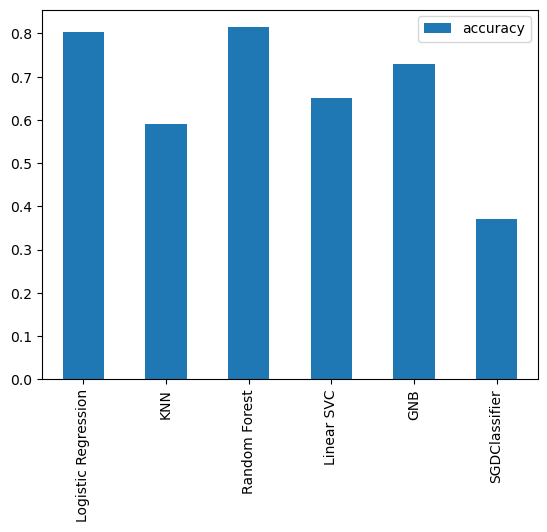

In [80]:
model_compare=pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [81]:
def fit_and_score_cv(models, transformed_X, y):
    """
    Fits and scores cross validation machine learning models.
    """
    np.random.seed(42)
    model_scores_cv={}
    for name, model in models.items():
        model_scores_cv[name]=cross_val_score(model,transformed_X,y).mean()
    return model_scores_cv

In [82]:
model_scores

{'Logistic Regression': 0.8033707865168539,
 'KNN': 0.5898876404494382,
 'Random Forest': 0.8146067415730337,
 'Linear SVC': 0.651685393258427,
 'GNB': 0.7303370786516854,
 'SGDClassifier': 0.3707865168539326}

In [83]:
model_scores_cv = fit_and_score_cv(models=models,
                                   transformed_X=transformed_X,
                                   y=y)
model_scores_cv

C:\Users\clims\ML_and_Data_Science\Titanic project\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\clims\ML_and_Data_Science\Titanic project\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\clims\ML_and_Data_Science\Titanic project\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\clims\ML_and_Data_Science\Titanic project\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\clims\ML_and_Data_Science\Titanic project\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

{'Logistic Regression': 0.7894242366533359,
 'KNN': 0.536126452104361,
 'Random Forest': 0.8063479972068812,
 'Linear SVC': 0.6087411921538755,
 'GNB': 0.7117818828159715,
 'SGDClassifier': 0.5382022471910113}

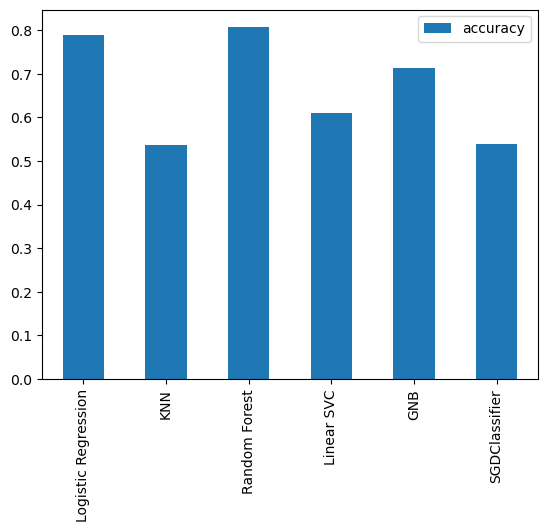

In [84]:
model_compare=pd.DataFrame(model_scores_cv, index=["accuracy"])
model_compare.T.plot.bar();

## Hyperparameter tuning

We will use GridSearchCV for Logistic Regression,Random Forest, GNB and Linear SVC.

In [85]:
# Different hyperparameters for LogisticRegression model
log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver": ["liblinear","newton-cg","sag", "saga"],
                "max_iter": [100, 1000,2500,5000],
                "penalty": ["l1", "l2", "elasticnet", "none"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)
# Fit grid hyperparameter
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


C:\Users\clims\ML_and_Data_Science\Titanic project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\clims\ML_and_Data_Science\Titanic project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\clims\ML_and_Data_Science\Titanic project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\clims\ML_and_Data_Science\Titanic project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\clims\ML_and_Data_Science\Titanic project\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

In [86]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.7278953843983146,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [87]:
gs_log_reg.score(X_train, y_train)

0.8112676056338028

In [88]:
gs_log_reg.score(X_test, y_test)

0.8089887640449438

In [133]:
# Different hyperparameters for Random Forest Classifier
random_forest_grid = {'n_estimators': [25, 50, 100, 150], 
                      'max_features': ['sqrt', 'log2', None], 
                      'max_depth': [None, 3, 6, 9, 10, 20], 
                      'max_leaf_nodes': [3, 6, 9],
                      'min_samples_split': [2,5,10],
                      'criterion': ['gini','entropy']}
# Setup grid hyperparameter search for Random Forest
gs_random_forest = GridSearchCV( RandomForestClassifier(),
                                 param_grid=random_forest_grid,
                                 cv=5,
                                 verbose=True)
# Fit grid hyperparameter
gs_random_forest.fit(X_train, y_train);

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


In [134]:
gs_random_forest.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': 6,
 'min_samples_split': 5,
 'n_estimators': 50}

In [135]:
gs_random_forest.score(X_train, y_train)

0.8394366197183099

In [136]:
gs_random_forest.score(X_test, y_test)

0.7921348314606742

In [93]:
# Different hyperparameters for GNB
gnb_grid = { 'var_smoothing': np.logspace(0,-9, num=100)}

#Setup grid hyperparameter search for GNB
gs_gnb = GridSearchCV(GaussianNB(),
                      param_grid=gnb_grid,
                      cv=5,
                      verbose=True)
# Fit grid hyperparameter
gs_gnb.fit(X_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [94]:
gs_gnb.score(X_train, y_train)

0.8014084507042254

In [95]:
gs_gnb.score(X_test, y_test)

0.7808988764044944

In [96]:
# Different hyperparameters for Linear SVC
svc_grid = { 'penalty': ['l1', 'l2'], 
              'loss':["hinge", "squared_hinge"],
              "class_weight": ["balanced", None]
              }
# Setup grid hyperparameter search for Linear SVC
gs_svc=GridSearchCV(LinearSVC(),
                    param_grid=svc_grid,
                    refit=True,
                    cv=5,
                    verbose=True)
# Fit grid hyperparameter
gs_svc.fit(X_train, y_train);

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\clims\ML_and_Data_Science\Titanic project\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\clims\ML_and_Data_Science\Titanic project\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\clims\ML_and_Data_Science\Titanic project\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\clims\ML_and_Data_Science\Titanic project\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\clims\ML_and_Data_Science\Titanic project\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

In [97]:
gs_svc.score(X_train, y_train)

0.7816901408450704

In [98]:
gs_svc.score(X_test, y_test)

0.7640449438202247

In [99]:
# Import test data and make predictions
df_test_data = pd.read_csv("test.csv")

In [100]:
df_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [101]:
df_test_data.drop("Name", axis=1, inplace=True)

In [102]:
df_test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [103]:
df_test_data.drop("Ticket", axis=1, inplace=True)

In [104]:
df_test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S


In [105]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,22.000000,1.0,0.0,7.2500
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,38.000000,1.0,0.0,71.2833
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,26.000000,0.0,0.0,7.9250
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,35.000000,1.0,0.0,53.1000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,887.0,2.0,27.000000,0.0,0.0,13.0000
884,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,888.0,1.0,19.000000,0.0,0.0,30.0000
885,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,889.0,3.0,29.620492,1.0,2.0,23.4500
886,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,890.0,1.0,26.000000,0.0,0.0,30.0000


In [106]:
df_test_data.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [107]:
df_test_data["cabin_adv"]=df_test_data.Cabin.apply(lambda x: str(x)[0])

In [108]:
df_test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,cabin_adv
0,892,3,male,34.5,0,0,7.8292,NaN,Q,n
1,893,3,female,47.0,1,0,7.0000,NaN,S,n
2,894,2,male,62.0,0,0,9.6875,NaN,Q,n
3,895,3,male,27.0,0,0,8.6625,NaN,S,n
4,896,3,female,22.0,1,1,12.2875,NaN,S,n


In [109]:
df_test_data.drop("Cabin", axis=1, inplace=True)

In [110]:
df_test_data.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
cabin_adv       0
dtype: int64

In [111]:
df_test_data["Age"].fillna(df_test_data["Age"].mean(), inplace=True)

In [112]:
df_test_data["Fare"].fillna(df_test_data["Fare"].mean(), inplace=True)

In [113]:
df_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
 8   cabin_adv    418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [114]:
# Turning strings into categories
for label, content in df_test_data.items():
    if pd.api.types.is_string_dtype(content):
        df_test_data[label]=content.astype("category").cat.as_ordered()

In [115]:
df_test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_adv
0,892,3,male,34.50000,0,0,7.8292,Q,n
1,893,3,female,47.00000,1,0,7.0000,S,n
2,894,2,male,62.00000,0,0,9.6875,Q,n
3,895,3,male,27.00000,0,0,8.6625,S,n
4,896,3,female,22.00000,1,1,12.2875,S,n
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,0,0,8.0500,S,n
414,1306,1,female,39.00000,0,0,108.9000,C,C
415,1307,3,male,38.50000,0,0,7.2500,S,n
416,1308,3,male,30.27259,0,0,8.0500,S,n


In [116]:
categorical_features = ["Sex", "Embarked", "cabin_adv"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder="passthrough")

test_X=transformer.fit_transform(df_test_data)
test_X

array([[ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.8292],
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  0.    ,  7.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  9.6875],
       ...,
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.25  ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  1.    ,  1.    , ...,  1.    ,  1.    , 22.3583]])

In [117]:
pd.DataFrame(test_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,892.0,3.0,34.50000,0.0,0.0,7.8292
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,893.0,3.0,47.00000,1.0,0.0,7.0000
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,894.0,2.0,62.00000,0.0,0.0,9.6875
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,895.0,3.0,27.00000,0.0,0.0,8.6625
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,896.0,3.0,22.00000,1.0,1.0,12.2875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1305.0,3.0,30.27259,0.0,0.0,8.0500
414,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1306.0,1.0,39.00000,0.0,0.0,108.9000
415,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1307.0,3.0,38.50000,0.0,0.0,7.2500
416,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1308.0,3.0,30.27259,0.0,0.0,8.0500


In [118]:
final_model = RandomForestClassifier(max_depth= 9, 
                                     max_features= None, 
                                     max_leaf_nodes= 9,
                                     n_estimators= 25,
                                     random_state=42)
final_model.fit(X_train, y_train)
predictions = final_model(test_X)

TypeError: 'RandomForestClassifier' object is not callable

In [137]:
y_preds = gs_random_forest.predict(test_X)

In [138]:
df_test_data.cabin_adv.value_counts()

cabin_adv
n    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: count, dtype: int64

In [139]:
output = pd.DataFrame({'PassengerId': df_test_data.PassengerId, 'Survived': y_preds})
output.to_csv('submission.csv', index=False)

In [140]:
letssee = pd.read_csv("submission.csv")
letssee

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [141]:
letssee.value_counts()

PassengerId  Survived
892          0           1
1205         1           1
1177         0           1
1176         0           1
1175         1           1
                        ..
1028         0           1
1027         0           1
1026         0           1
1025         0           1
1309         0           1
Name: count, Length: 418, dtype: int64